导入数据：

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
model_data = pd.read_csv("donations2.csv").drop(["ID","TARGET_B"],1)
model_data.head()

,TARGET_D,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,NaN,2,4,1,3,17.0,13.50,9.25,17.00,21,...,13,A,0,0,NaN,F,U,0,0,0
1,NaN,1,8,0,3,20.0,20.00,15.88,NaN,26,...,24,A,0,23,67.0,F,U,186800,85,0
2,4.0,6,41,3,20,6.0,5.17,3.73,5.00,18,...,22,S,1,0,NaN,M,U,87600,36,38750
3,10.0,3,12,3,8,10.0,8.67,8.50,8.67,9,...,16,E,1,0,NaN,M,U,139200,27,38942
4,NaN,1,1,1,1,20.0,20.00,20.00,20.00,21,...,6,F,0,35,53.0,M,U,168100,37,71509


In [2]:
model_data.dtypes
y = ["TARGET_D"]
var_c = ["GiftCnt36","GiftCntAll","GiftCntCard36","GiftCntCardAll","GiftTimeLast",
         "GiftTimeFirst","PromCnt12","PromCnt36","PromCntAll","PromCntCard12",
         "PromCntCard36","PromCntCardAll","StatusCatStarAll","DemAge",
         "DemMedHomeValue","DemPctVeterans","DemMedIncome","GiftAvgLast",
         "GiftAvg36","GiftAvgAll","GiftAvgCard36"]
var_d = ['DemGender', 'StatusCat96NK', 'DemCluster', 'DemHomeOwner']
X = model_data[var_c + var_d]
Y = model_data[y]

连续型变量重要性筛选：

In [3]:
corr_s = abs(model_data[y + var_c].corr(method = 'spearman'))
corr_s = pd.DataFrame(corr_s.iloc[0,:])
corr_p = abs(model_data[y + var_c].corr(method = 'pearson'))
corr_p = pd.DataFrame(corr_p.iloc[0,:])
corr_sp = pd.concat([corr_s,corr_p], axis = 1)
corr_sp.columns = ['spearman','pearson']
corr_sp[(corr_sp['spearman'] <= 0.1) & (corr_sp['pearson'] <= 0.1)]

,spearman,pearson
PromCnt12,0.009414,0.064494
PromCnt36,0.031979,0.007337
PromCntCard12,0.011849,0.006996
DemAge,0.098663,0.056139
DemPctVeterans,0.023376,0.021628
DemMedIncome,0.059946,0.029132


In [4]:
var_c_s = set(var_c) - set(['PromCnt12','PromCnt36',
                            'PromCntCard12','DemAge',
                            'DemPctVeterans','DemMedIncome'])
var_c_s = list(var_c_s)

离散型变量筛选：

In [5]:
import statsmodels.stats.anova as anova
from statsmodels.formula.api import ols
for i in var_d:
    formula = "TARGET_D ~ " + str(i)
    print(anova.anova_lm(ols(formula,data = model_data[var_d+['TARGET_D']]).fit()))

               df         sum_sq     mean_sq         F    PR(>F)
DemGender     2.0    1552.299527  776.149763  5.019571  0.006642
Residual   4840.0  748383.622667  154.624715       NaN       NaN
                   df         sum_sq      mean_sq          F        PR(>F)
StatusCat96NK     5.0   46323.378267  9264.675653  63.690218  1.487957e-64
Residual       4837.0  703612.543927   145.464657        NaN           NaN
                df         sum_sq      mean_sq          F        PR(>F)
DemCluster     1.0    7051.073357  7051.073357  45.948233  1.359482e-11
Residual    4841.0  742884.848837   153.456899        NaN           NaN
                  df         sum_sq     mean_sq        F    PR(>F)
DemHomeOwner     1.0      45.080271   45.080271  0.29102  0.589592
Residual      4841.0  749890.841922  154.904119      NaN       NaN


C:\Users\Ben\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Ben\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Ben\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [6]:
var_d_s = list(set(var_d) - set(["DemHomeOwner"]))
var_d_s

['DemGender', 'StatusCat96NK', 'DemCluster']

变量探索与变量变换（E）：

In [7]:
X = model_data[var_c_s + var_d_s].copy()
Y = model_data[y].copy()
model_data[var_c_s+var_d_s].head()

,GiftCntAll,PromCntCard36,GiftAvgAll,GiftAvgLast,StatusCatStarAll,GiftAvg36,GiftCnt36,GiftTimeLast,GiftAvgCard36,PromCntCardAll,DemMedHomeValue,PromCntAll,GiftCntCard36,GiftTimeFirst,GiftCntCardAll,DemGender,StatusCat96NK,DemCluster
0,4,8,9.25,17.0,0,13.50,2,21,17.00,13,0,26,1,66,3,F,A,0
1,8,5,15.88,20.0,0,20.00,1,26,NaN,24,186800,79,0,92,3,F,A,23
2,41,11,3.73,6.0,1,5.17,6,18,5.00,22,87600,51,3,111,20,M,S,0
3,12,6,8.50,10.0,1,8.67,3,9,8.67,16,139200,44,3,93,8,M,E,0
4,1,7,20.00,20.0,0,20.00,1,21,20.00,6,168100,13,1,21,1,M,F,35


In [8]:
X[var_c_s].describe().T

,count,mean,std,min,25%,50%,75%,max
GiftCntAll,9686.0,10.507640,8.993401,1.00,4.00,8.00,15.0,91.0
PromCntCard36,9686.0,11.954677,4.571568,2.00,7.00,13.00,16.0,28.0
GiftAvgAll,9686.0,12.489325,9.209297,1.50,7.75,10.71,15.0,450.0
GiftAvgLast,9686.0,16.017739,12.041805,0.00,10.00,15.00,20.0,450.0
StatusCatStarAll,9686.0,0.540574,0.498377,0.00,0.00,1.00,1.0,1.0
GiftAvg36,9686.0,14.876203,10.057007,0.00,9.60,13.50,18.5,260.0
GiftCnt36,9686.0,3.205451,2.133421,0.00,2.00,3.00,4.0,16.0
GiftTimeLast,9686.0,18.002168,4.073549,4.00,16.00,18.00,20.0,27.0
GiftAvgCard36,7906.0,14.224431,10.022710,1.33,8.67,12.50,18.0,260.0
PromCntCardAll,9686.0,19.007124,8.562193,2.00,12.00,19.00,26.0,56.0


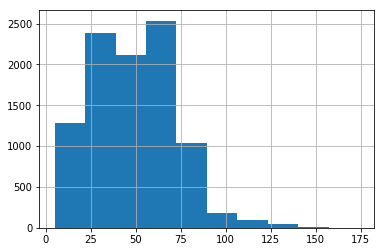

In [9]:
abs((X[var_c_s].mode().iloc[0,] - X[var_c_s].median()) /
    (X[var_c_s].quantile(0.75) - X[var_c_s].quantile(0.25)))
X["PromCntAll"].hist()

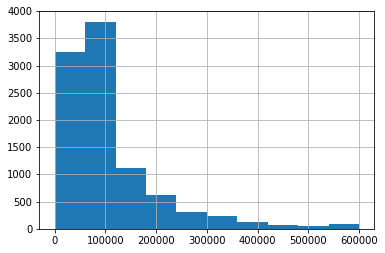

In [10]:
X["DemMedHomeValue"].hist()

In [11]:
X["DemMedHomeValue"].describe().T

count      9686.000000
mean     110986.299814
std       98670.855450
min           0.000000
25%       52300.000000
50%       76900.000000
75%      128175.000000
max      600000.000000
Name: DemMedHomeValue, dtype: float64

In [12]:
X["DemGender"].value_counts()

F    5223
M    3925
U     538
Name: DemGender, dtype: int64

In [13]:
X["StatusCat96NK"].value_counts()#有的水平数量太少

A    5826
S    2365
F     660
N     574
E     227
L      34
Name: StatusCat96NK, dtype: int64

In [14]:
X["DemCluster"].value_counts()[:10]

40    432
24    401
36    401
35    384
27    331
49    323
12    323
18    321
13    309
30    262
Name: DemCluster, dtype: int64

In [15]:
X['DemMedHomeValue'].replace(0, np.nan, inplace = True)

变量的修改阶段（M）：

连续变量处理：

In [16]:
1 - (X.describe().T["count"]) / len(X)

GiftCntAll          0.000000
PromCntCard36       0.000000
GiftAvgAll          0.000000
GiftAvgLast         0.000000
StatusCatStarAll    0.000000
GiftAvg36           0.000000
GiftCnt36           0.000000
GiftTimeLast        0.000000
GiftAvgCard36       0.183770
PromCntCardAll      0.000000
DemMedHomeValue     0.010634
PromCntAll          0.000000
GiftCntCard36       0.000000
GiftTimeFirst       0.000000
GiftCntCardAll      0.000000
DemCluster          0.000000
Name: count, dtype: float64

In [17]:
GiftAvgCard36_fill = X["GiftAvgCard36"].median()
DemMedHomeValue_fill = X["DemMedHomeValue"].median()
X["GiftAvgCard36"].fillna(GiftAvgCard36_fill,inplace = True)
X["DemMedHomeValue"].fillna(DemMedHomeValue_fill,inplace = True)
skew_var_x = {}
for i in var_c_s:
    skew_var_x[i]=abs(X[i].skew())   
skew = pd.Series(skew_var_x).sort_values(ascending=False)
skew

GiftAvgAll          14.486489
GiftAvgLast          9.918893
GiftAvgCard36        6.747117
GiftAvg36            5.627792
DemMedHomeValue      2.412552
GiftCntAll           1.863109
GiftCntCardAll       1.331353
GiftCnt36            1.288353
GiftCntCard36        1.172452
GiftTimeLast         0.778047
PromCntAll           0.460765
PromCntCard36        0.426600
GiftTimeFirst        0.195399
StatusCatStarAll     0.162858
PromCntCardAll       0.142856
dtype: float64

In [18]:
var_x_ln = skew[skew >= 1].index
var_x_ln

Index(['GiftAvgAll', 'GiftAvgLast', 'GiftAvgCard36', 'GiftAvg36',
       'DemMedHomeValue', 'GiftCntAll', 'GiftCntCardAll', 'GiftCnt36',
       'GiftCntCard36'],
      dtype='object')

In [19]:
for i in var_x_ln:
    if min(X[i]) <= 0:
        X[i] = np.log(X[i] + abs(min(X[i])) + 0.01)
    else:
        X[i] = np.log(X[i])

In [20]:
skew_var_x = {}
for i in var_c_s:
    skew_var_x[i]=abs(X[i].skew())

skew = pd.Series(skew_var_x).sort_values(ascending=False)
skew

GiftAvg36           5.036038
GiftAvgLast         3.405981
GiftCnt36           2.805648
GiftCntCardAll      2.373377
GiftCntCard36       1.382692
GiftTimeLast        0.778047
DemMedHomeValue     0.586459
PromCntAll          0.460765
GiftCntAll          0.457529
PromCntCard36       0.426600
GiftAvgAll          0.219720
GiftTimeFirst       0.195399
StatusCatStarAll    0.162858
PromCntCardAll      0.142856
GiftAvgCard36       0.031261
dtype: float64

分类变量处理：

In [21]:
DemC_group = model_data[['DemCluster','TARGET_D']].groupby('DemCluster',as_index = False)
DemC_C= DemC_group['TARGET_D'].agg({'mean' : 'mean','count':'count',"median":"median"}).sort_values(["median","mean"])
DemC_C["count_cumsum"] = DemC_C["count"].cumsum()
DemC_C["new_DemCluster"] = DemC_C["count_cumsum"].apply(lambda x:x//(len(model_data)/10)+1)
DemC_C["new_DemCluster"] = DemC_C["new_DemCluster"].astype(int)
DemC_C.head()

,DemCluster,mean,count,median,count_cumsum,new_DemCluster
52,52,10.769231,13,10.0,13,1
30,30,12.091743,109,10.0,122,1
47,47,12.411765,34,10.0,156,1
51,51,12.693069,101,10.0,257,1
45,45,13.180190,105,10.0,362,1


In [22]:
DemCluster_new_class = DemC_C[["DemCluster","new_DemCluster"]].set_index("DemCluster")
X["DemCluster"] = X["DemCluster"].map(DemCluster_new_class.to_dict()['new_DemCluster'])
new_DemGender = {"F":1,"M":2,"U":3}
X['DemGender'] = X['DemGender'].map(new_DemGender)
StatusCat96NK_group = model_data[['StatusCat96NK','TARGET_D']].groupby('StatusCat96NK', as_index = False)
StatusCat96NK_class = StatusCat96NK_group['TARGET_D'].agg({'mean' : 'mean', 'count':'count',"median":"median"}).sort_values(["median","mean"])
StatusCat96NK_class

,StatusCat96NK,mean,count,median
5,S,11.063452,1379,10.0
0,A,16.995004,2794,15.0
1,E,17.136364,132,15.0
4,N,17.654167,264,15.0
2,F,21.729416,257,20.0
3,L,24.764706,17,25.0


In [23]:
new_StatusCat96NK = {"S":1,"A":2,"E":2,"N":2,"F":2,"L":2}
X['StatusCat96NK'] = X['StatusCat96NK'].map(new_StatusCat96NK)
X.head()

,GiftCntAll,PromCntCard36,GiftAvgAll,GiftAvgLast,StatusCatStarAll,GiftAvg36,GiftCnt36,GiftTimeLast,GiftAvgCard36,PromCntCardAll,DemMedHomeValue,PromCntAll,GiftCntCard36,GiftTimeFirst,GiftCntCardAll,DemGender,StatusCat96NK,DemCluster
0,1.386294,8,2.224624,2.833801,0,2.603430,0.698135,21,2.833213,13,11.260611,26,0.00995,66,1.101940,1,2,3
1,2.079442,5,2.765060,2.996232,0,2.996232,0.009950,26,2.525729,24,12.137794,79,-4.60517,92,1.101940,1,2,2
2,3.713572,11,1.316408,1.793425,1,1.644805,1.793425,18,1.609438,22,11.380536,51,1.10194,111,2.996232,2,1,3
3,2.484907,6,2.140066,2.303585,1,2.161022,1.101940,9,2.159869,16,11.843667,44,1.10194,93,2.080691,2,2,3
4,0.000000,7,2.995732,2.996232,0,2.996232,0.009950,21,2.995732,6,12.032314,13,0.00995,21,0.009950,2,2,4


前向选择法筛选变量:

In [24]:
import statsmodels.formula.api as smf
def forward_selected(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return selected

In [25]:
XX=pd.concat([X[var_c_s+var_d_s],Y],axis = 1)

In [26]:
final_var = forward_selected(XX,'TARGET_D')

In [27]:
var_c_s = list(set(var_c_s)&set(final_var))
var_c_s

['GiftCntAll',
 'GiftAvgAll',
 'GiftAvgLast',
 'GiftAvgCard36',
 'GiftAvg36',
 'GiftCnt36',
 'DemMedHomeValue',
 'GiftCntCard36',
 'PromCntCardAll']

In [28]:
var_d_s = list(set(var_d_s)&set(final_var))
var_d_s

['DemGender']

In [29]:
model_final = pd.concat([X[var_d_s + var_c_s],Y], axis = 1)
model_final.columns

Index(['DemGender', 'GiftCntAll', 'GiftAvgAll', 'GiftAvgLast', 'GiftAvgCard36',
       'GiftAvg36', 'GiftCnt36', 'DemMedHomeValue', 'GiftCntCard36',
       'PromCntCardAll', 'TARGET_D'],
      dtype='object')

建立线性回归模型:

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
X = model_final.iloc[:,:-1]
Y = model_final.iloc[:,-1]
formula = 'TARGET_D ~ ' + '+'.join(final_var) 
donation_model = ols(formula,model_final).fit()
print(donation_model.summary())

C:\Users\Ben\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:               TARGET_D   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     368.9
Date:                Thu, 19 Jul 2018   Prob (F-statistic):               0.00
Time:                        00:05:39   Log-Likelihood:                -17709.
No. Observations:                4843   AIC:                         3.544e+04
Df Residuals:                    4832   BIC:                         3.551e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -28.0753      2.408    -